UNAD hierarchical clustering

In [18]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones
from scipy.cluster.hierarchy import dendrogram, linkage 
# librerías de para implementar modelo Kmeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('./Mall_Customers.csv')

In [3]:
Datos.head(40)


,ID_de_cliente,sexo,edad,ingresos_anuales_(k$),puntuación_de_gastos_(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
# Descripción de los datos
Datos.describe()

,ID_de_cliente,edad,ingresos_anuales_(k$),puntuación_de_gastos_(1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

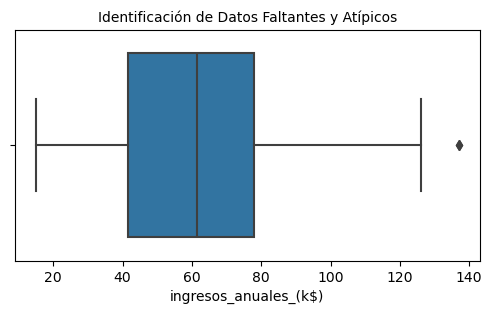

In [5]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['ingresos_anuales_(k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )


2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [6]:
#Revisión de datos faltantes
print("Cantidad de Registros con cero en ID de cliente: ",Datos['ID_de_cliente'].isin([0]).sum())
print("Cantidad de Registros con cero en Edad: ",Datos['edad'].isin([0]).sum())
print("Cantidad de Registros con cero en ingresos anuales (k$)	: ",Datos['ingresos_anuales_(k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en puntuación de gastos(1-100): ",Datos['puntuación_de_gastos_(1-100)'].isin([0]).sum())

Cantidad de Registros con cero en ID de cliente:  0
Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en ingresos anuales (k$)	:  0
Cantidad de Registros con cero en puntuación de gastos(1-100):  0


In [7]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['ingresos_anuales_(k$)']=Datos['ingresos_anuales_(k$)'].replace(0,Datos['ingresos_anuales_(k$)'].mean())

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

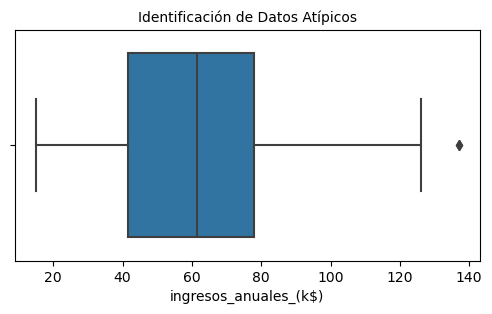

In [8]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['ingresos_anuales_(k$)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [9]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['ingresos_anuales_(k$)']<nivel_minimo)|(Datos['ingresos_anuales_(k$)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 14


In [10]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['ingresos_anuales_(k$)']<nivel_maximo)&(Datos['ingresos_anuales_(k$)']>nivel_minimo)]

In [11]:
nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['ingresos_anuales_(k$)']<nivel_minimo)|(Datos['ingresos_anuales_(k$)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [12]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, 0 to 185
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID_de_cliente                 186 non-null    int64 
 1   sexo                          186 non-null    object
 2   edad                          186 non-null    int64 
 3   ingresos_anuales_(k$)         186 non-null    int64 
 4   puntuación_de_gastos_(1-100)  186 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.7+ KB


In [13]:
X=Datos[['ingresos_anuales_(k$)','puntuación_de_gastos_(1-100)']].values

In [22]:
linked = linkage(X,'average')

# crear el dendograma
plt.figure(figsize=(10,7))
dendrogram(linked,
           orientation="top",
           labels=Datos['puntuación_de_gastos_(1-100)'].astype(str).values,
           distance_sort="descending",
           show_leaf_counts = True)
plt.title("dendrograma jerarquico de ingreswos anueles y puntuacion de gastos")
plt.show()

In [30]:
# describe el numero de clusters basado en el dendrograma
clustering = AgglomerativeClustering(n_clusters=4, linkage="average")
clustering. fit(X)


AgglomerativeClustering(linkage='average', n_clusters=4)

In [31]:
#añadir la asugnacion  de clkusters al dataframe
Datos["Cluster"] = clustering.labels_


In [38]:
#calcular y mostrar las metricas de evaluacion
silhouette_avg= silhouette_score(X,clustering.labels_)
davies_bouldin=davies_bouldin_score(X,clustering.labels_)
calinski_harabasz=calinski_harabasz_score(X,clustering.labels_)
print(f"coeficiente de silveta: ",(silhouette_avg)) 
print(f"coeficiente de davies_bouldin: ", (davies_bouldin)) 
print(f"coeficiente de calinski_harabasz: ", (calinski_harabasz)) 

coeficiente de silveta:  0.49985829882930666
coeficiente de davies_bouldin:  0.6777297374949532
coeficiente de calinski_harabasz:  161.06994648813668


In [ ]:
Calidad Moderada de la Separación de Clústeres (Índice de Silueta = 0.499) :

El valor del índice de silueta es de 0.499, lo que sugiere que la separación entre los clústeres es moderada. Un valor de silueta cercano a 1
indica que los clústeres están bien separados, mientras que un valor cercano a 0 indica que los puntos están en el límite de dos clústeres.
En este caso, aunque no es un valor perfecto, indica que los clústeres están relativamente bien definidos, pero hay espacio para mejorar la separación

Buen Índice de Davies-Bouldin (Índice de Davies-Bouldin = 0,677) :

Un índice de Davies-Bouldin más bajo indica clústeres más compactos y bien separados. Con un valor de 0.677,
los clústeres formados son bastante buenos, ya que un valor más bajo de este índice indica menor similitud entre clústeres y, por lo tanto,
mejor separación y compactación de los mismos.


Buen Rendimiento según el Índice de Calinski-Harabasz (Índice de Calinski-Harabasz = 161) :

El índice de Calinski-Harabasz, también conocido como el criterio de variación entre grupos,
es mayor cuando los clústeres son más compactos y bien separados. Un valor de 161 indica que los clústeres son razonablemente compactos y tienen una
buena separación entre ellos. Este alto valor sugiere que el modelo ha realizado un buen trabajo en la formación de clústeres claramente definidos.